# Analyses statistiques et visualisations des variables **catégorielles**

## Objectif

XXX

## Sommaire

1. Initialisation
2. Analyse globale
3. Étude des variables

## 1. Initialisation

In [1]:
# Importation des bibliothèques et modules nécessaires au fonctionnement de ce notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
# Définition des paramètres esthétiques généraux

%matplotlib inline
sns.set_theme(style = "whitegrid", palette = "bright")

In [3]:
# Importation du jeu de données et enregistrement dans le DataFrame `df`

df = pd.read_csv("../../data/raw/weatherAUS.csv")

In [4]:
# Affichage des 5 premières lignes de `df`

df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


## 2. Analyse globale

In [4]:
# Création d'une copie de df contenant toutes les variables qualitatives:

cat = df.select_dtypes(include = object).copy()
cat.head()

# Nous avons seulement 5 variables qualitatives à étudier pour décider d'un mode de gestion des nan.
# Variables explicatives: WindGustDir, WindDir9am, WindDir3pm, RainToday
# Variable cible: RainTomorrow

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


In [6]:
for col in cat.columns[2:] :
    print(cat[col].value_counts(normalize = True))
    print('')

WindGustDir
W      0.073372
SE     0.069694
N      0.068917
SSE    0.068199
E      0.067940
S      0.067844
WSW    0.067111
SW     0.066356
SSW    0.064647
WNW    0.061065
NW     0.060103
ENE    0.059970
ESE    0.054553
NE     0.052785
NNW    0.048988
NNE    0.048456
Name: proportion, dtype: float64

WindDir9am
N      0.087165
SE     0.068847
E      0.068024
SSE    0.067549
NW     0.064858
S      0.064191
W      0.062708
SW     0.062442
NNE    0.060262
NNW    0.059158
ENE    0.058090
NE     0.056867
ESE    0.056563
SSW    0.056244
WNW    0.054962
WSW    0.052071
Name: proportion, dtype: float64

WindDir3pm
SE     0.076739
W      0.071584
S      0.070282
WSW    0.067393
SSE    0.066550
SW     0.066231
N      0.062946
WNW    0.062833
NW     0.060964
ESE    0.060220
E      0.059986
NE     0.058507
SSW    0.057749
NNW    0.055724
ENE    0.055632
NNE    0.046661
Name: proportion, dtype: float64

RainToday
No     0.775807
Yes    0.224193
Name: proportion, dtype: float64

RainTomorrow
No     

## 3. Étude des variables

### `WindGustDir`

/Users/omarchoa/anaconda3/envs/datascientest_project/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


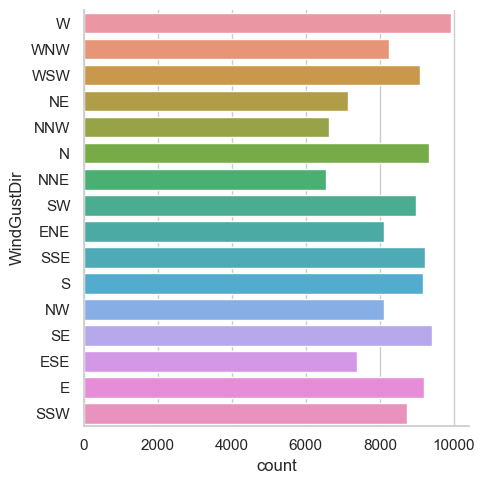

In [7]:
sns.catplot(y = 'WindGustDir', data = cat, kind = 'count')
#plt.yticks(rotation = 90)
plt.show()

# Bilan: quelle modalité de gestion des nan?

In [8]:
# Recherche des stations ne mesurant pas 'WindGustDir':
df_location_WindGustDir_counts = cat[["Location", "WindGustDir"]].groupby("Location").count()
df_location_WindGustDir_counts[df_location_WindGustDir_counts["WindGustDir"] == 0]

,WindGustDir
Location,
Albany,0
Newcastle,0


In [9]:
df_location_WindGustDir_counts

,WindGustDir
Location,
Adelaide,3167
Albany,0
Albury,3008
AliceSprings,2989
BadgerysCreek,2933
Ballarat,3009
Bendigo,2999
Brisbane,3152
Cairns,3021


In [10]:
# OC, 26/10 : à débugger

"""
nan_rate = []
for col in albury.columns:
    nan_rate.append([col,round(albury[col].isna().sum()/albury.shape[0]*100, 1) ])
print(pd.DataFrame(nan_rate))
"""

NameError: name 'albury' is not defined

ValueError: Cannot pass values for both `x` and `y`

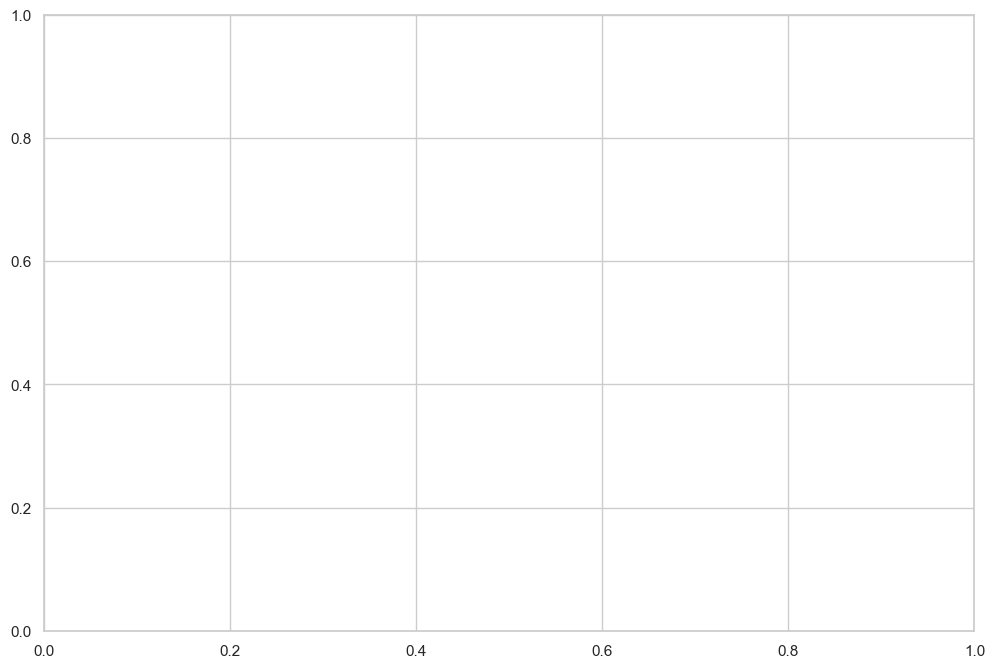

In [11]:
# OC, 26/10 : à débugger

"""
# Création d'un graphique donnant le taux de nan par station pour la mesure "WindGustDir"

## Initialisation de la toile
fig, ax = plt.subplots(figsize = (12, 8))

## Traçage
sns.countplot(x = df["Location"].sort_values(ascending = True),
              y = df["WindGustDir"],
              color = "#588157",
              flierprops={"marker": "x",
                          "markeredgecolor": "#a3b18a"})

## Mise en forme
plt.xticks(rotation = 90)
plt.ylim(0, 140)
plt.ylabel("WindGustDir)")
plt.title("Taux de nan pour WindGustDir par station météo", fontweight = "bold");

### Mise en évidence des stations météo ne disposant pas de données pour « WindGustSpeed »
for index in range(len(df_location_WindGustDir_counts)):
    if df_location_WindGustDir_counts.iloc[index][0] == 0:
        ax.get_xticklabels()[index].set_color("#dda15e")
        ax.get_xticklabels()[index].set_weight("bold")
"""

### `WindDir9am`

/Users/omarchoa/anaconda3/envs/datascientest_project/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


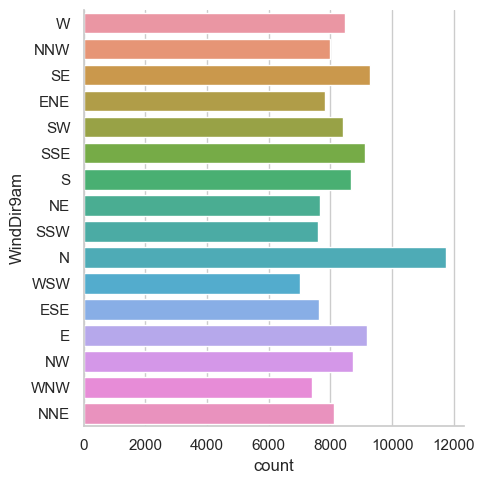

In [12]:
sns.catplot(y = 'WindDir9am', data = cat, kind = 'count')
#plt.yticks(rotation = 90)
plt.show()

# Bilan: quelle modalité de gestion des nan?
# !! surplus du vent du nord: remplacer les nan par la modalité la plus fréquence présente un risque de biaiser les données ici ou pas?

### `WindDir3pm`

/Users/omarchoa/anaconda3/envs/datascientest_project/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


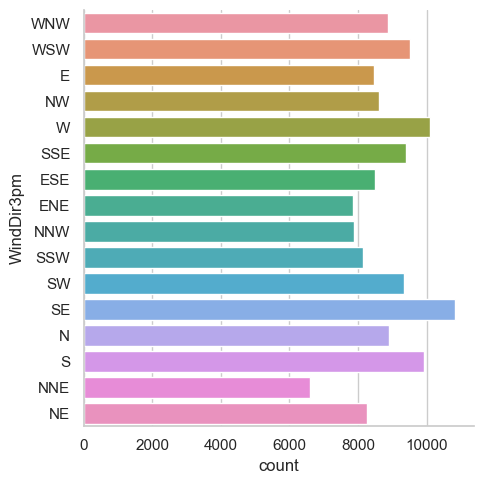

In [13]:
sns.catplot(y = 'WindDir3pm', data = cat, kind = 'count')
#plt.yticks(rotation = 90)
plt.show()

# Bilan: quelle modalité de gestion des nan?

### `RainToday`

/Users/omarchoa/anaconda3/envs/datascientest_project/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x600 with 0 Axes>

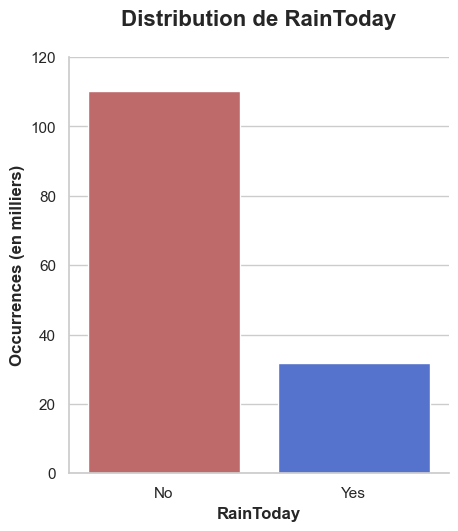

In [7]:
# OC, 25/10 : graphique pour rapport 1

plt.figure(figsize = (6, 6))

color_dictionary = {"Yes": "royalblue",
                    "No": "indianred"}

catplot_raintoday = sns.catplot(data = cat,
                                x = 'RainToday',
                                kind = 'count',
                                palette = color_dictionary)

plt.xlabel("RainToday", fontweight = "bold")
plt.ylabel("Occurrences (en milliers)", fontweight = "bold")

y_ticks_locations = [i * 10000 for i in range(0, 14, 2)]
y_ticks_simplified_labels = [i * 10 for i in range(0, 14, 2)]
plt.yticks(ticks = y_ticks_locations,
           labels = y_ticks_simplified_labels)

plt.title("Distribution de RainToday\n", fontweight = "bold", fontsize = 16)

plt.show()

# Bilan: quelle modalité de gestion des nan?

### `RainTomorrow`

In [15]:
#### Premier examen de la distribution de la variable cible

/Users/omarchoa/anaconda3/envs/datascientest_project/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x600 with 0 Axes>

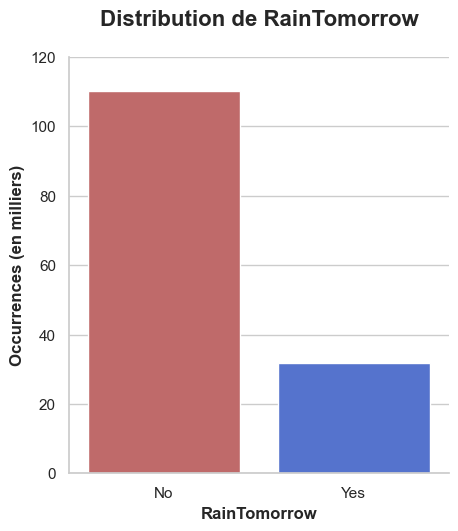

In [8]:
# OC, 25/10 : graphique pour rapport 1

plt.figure(figsize = (6, 6))

color_dictionary = {"Yes": "royalblue",
                    "No": "indianred"}

catplot_raintoday = sns.catplot(data = cat,
                                x = 'RainTomorrow',
                                kind = 'count',
                                palette = color_dictionary)

plt.xlabel("RainTomorrow", fontweight = "bold")
plt.ylabel("Occurrences (en milliers)", fontweight = "bold")

y_ticks_locations = [i * 10000 for i in range(0, 14, 2)]
y_ticks_simplified_labels = [i * 10 for i in range(0, 14, 2)]
plt.yticks(ticks = y_ticks_locations,
           labels = y_ticks_simplified_labels)

plt.title("Distribution de RainTomorrow\n", fontweight = "bold", fontsize = 16)

plt.show()

# Bilan: quelle modalité de gestion des nan?

In [17]:
#### Conclusion : sur la période sous étude, et compte tenu des conditions météorologiques d'un jour donné, il ne pleut généralement pas le lendemain.

In [9]:
cat = cat.dropna()

### `RainToday` après `dropna`

/Users/omarchoa/anaconda3/envs/datascientest_project/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x600 with 0 Axes>

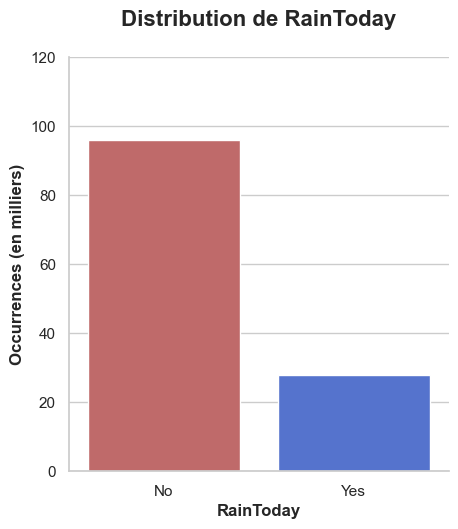

In [10]:
plt.figure(figsize = (6, 6))

color_dictionary = {"Yes": "royalblue",
                    "No": "indianred"}

catplot_raintoday = sns.catplot(data = cat,
                                x = 'RainToday',
                                kind = 'count',
                                palette = color_dictionary)

plt.xlabel("RainToday", fontweight = "bold")
plt.ylabel("Occurrences (en milliers)", fontweight = "bold")

y_ticks_locations = [i * 10000 for i in range(0, 14, 2)]
y_ticks_simplified_labels = [i * 10 for i in range(0, 14, 2)]
plt.yticks(ticks = y_ticks_locations,
           labels = y_ticks_simplified_labels)

plt.title("Distribution de RainToday\n", fontweight = "bold", fontsize = 16)

plt.show()

### `RainTomorrow` après `dropna`

/Users/omarchoa/anaconda3/envs/datascientest_project/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x600 with 0 Axes>

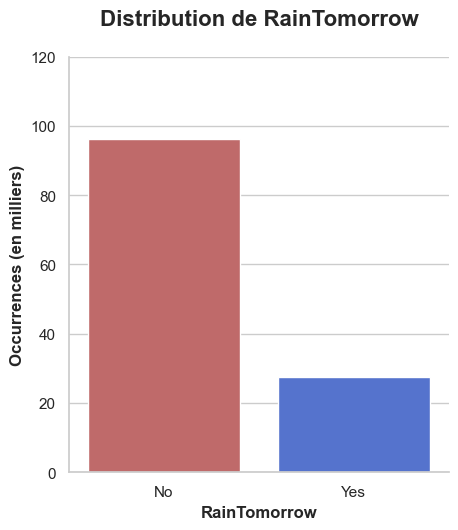

In [11]:
plt.figure(figsize = (6, 6))

color_dictionary = {"Yes": "royalblue",
                    "No": "indianred"}

catplot_raintoday = sns.catplot(data = cat,
                                x = 'RainTomorrow',
                                kind = 'count',
                                palette = color_dictionary)

plt.xlabel("RainTomorrow", fontweight = "bold")
plt.ylabel("Occurrences (en milliers)", fontweight = "bold")

y_ticks_locations = [i * 10000 for i in range(0, 14, 2)]
y_ticks_simplified_labels = [i * 10 for i in range(0, 14, 2)]
plt.yticks(ticks = y_ticks_locations,
           labels = y_ticks_simplified_labels)

plt.title("Distribution de RainTomorrow\n", fontweight = "bold", fontsize = 16)

plt.show()